## Modèle 2

### Chaque pays peut accueillir entre 100 et 200 (200 non inclu) perrsonnes chaque années indépendement des autres pays
### Ce nombre peut varier chaque année pour un meme pays

In [1]:
import random
import math
random.seed(0)
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')

In [2]:
# Nouvelle fonction initialisation

def initialisation(nb_pays, nb_individus, nb_annees):
    pays =      {i:[random.random(), random.random(), math.floor(random.random()*100)+100, 0] for i in range(nb_pays)}
    individus = {i:[random.random(), random.random(), -1] for i in range(nb_individus)}

    historique_pays =      {i:[] for i in range(nb_pays)}
    historique_individus = {i:[] for i in range(nb_individus)}

    return pays, individus, historique_pays, historique_individus

# Nouvelle fonction repartition_annuelle

def repartition_annuelle(pays, individus):
    for k1 in individus.keys():
        acc = 0.0
        p = individus[k1][2]
        
        for k2 in pays.keys():
            n = individus[k1][0]*pays[k2][0] + individus[k1][1]*pays[k2][1]
            
            if n > acc and pays[k2][2] > 0:
                acc = n
                p = k2
        individus[k1][2] = p
        pays[p][2] = pays[p][2]-1
        pays[p][3] = pays[p][3]+1

# Nouvelle fonction changement_pays

def changement_pays(pays):
    for k in pays.keys():
        pays[k][2] = math.floor(random.random()*100)+100;
        pays[k][3] = 0
        f = random.random()
        if f < 0.5:
            pays[k][0] = pays[k][0]*0.75 + 0.25*random.random()
            pays[k][1] = pays[k][1]*0.75 + 0.25*random.random()

# Nouvelle fonction mise_a_jour_historique

def mise_a_jour_historique(pays, individus, historique_pays, historique_individus):
    for k1 in historique_pays.keys():
        historique_pays[k1].append([pays[k1][0], pays[k1][1], pays[k1][3]])
        
    for k2 in historique_individus.keys():
        historique_individus[k2].append(individus[k2][2])

# Les fonctions suivantes n'ont pas été modifiées

def changement_individus(individus):
    for k in individus.keys():
        f = random.random()
        if f < 0.5:
            individus[k][0] = individus[k][0]*0.75 + 0.25*random.random()
            individus[k][1] = individus[k][1]*0.75 + 0.25*random.random()
            
def migration(data, nb_annees):
    for i in range(nb_annees):
        plt.figure()
        repartition_annuelle(data[0], data[1])
        mise_a_jour_historique(data[0], data[1], data[2], data[3])
        plt.hist([data[1][k][2] for k in data[1].keys()], bins = [i for i in range(len(data[0]) + 1)])
        plt.show()
        changement_pays(data[0])
        changement_individus(data[1])

In [3]:
nb_pays = 5
nb_individus = 250
nb_annees = 50

data = initialisation(nb_pays, nb_individus, nb_annees)

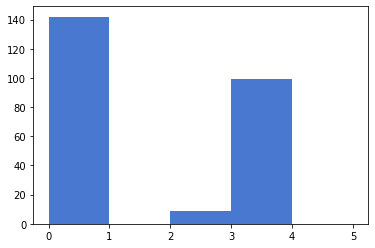

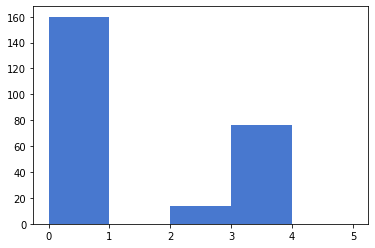

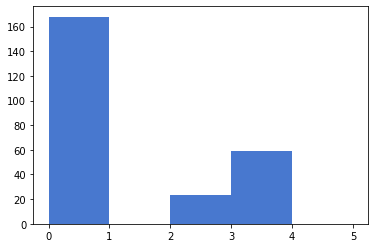

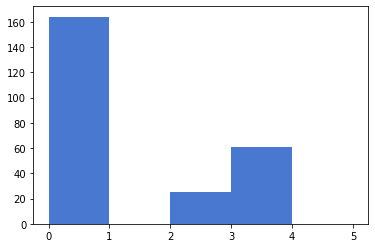

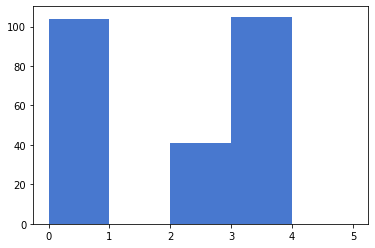

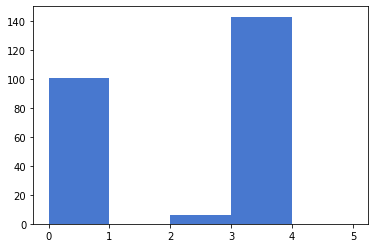

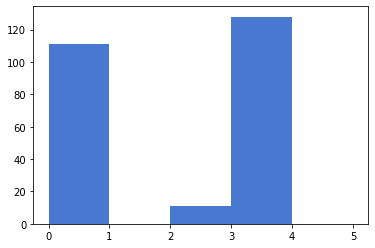

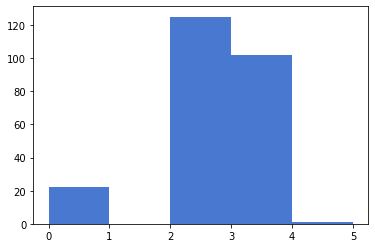

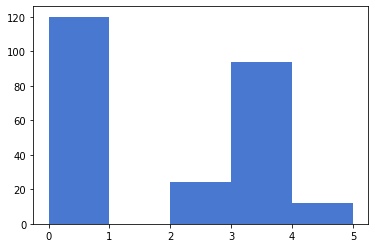

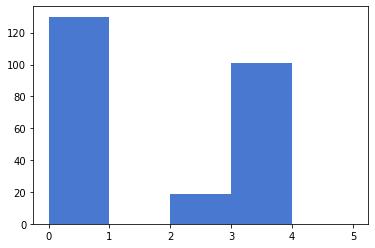

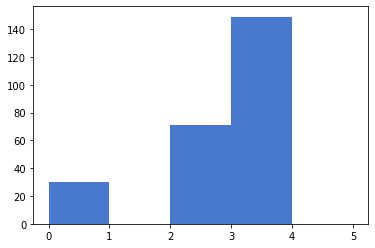

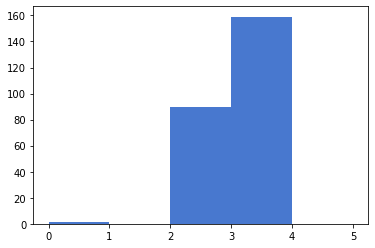

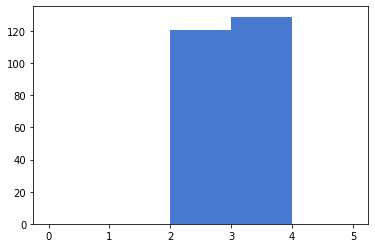

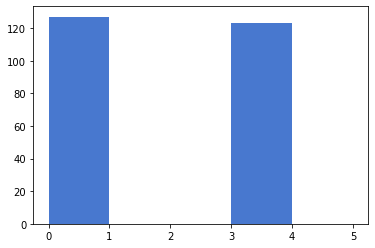

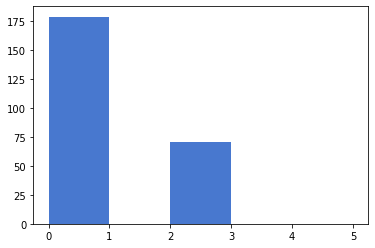

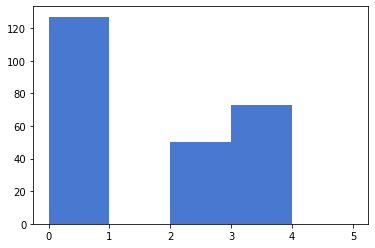

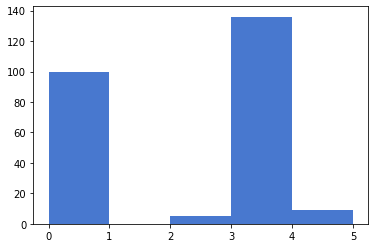

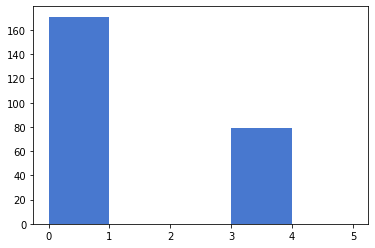

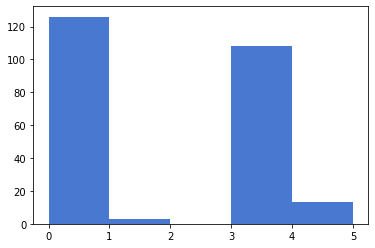

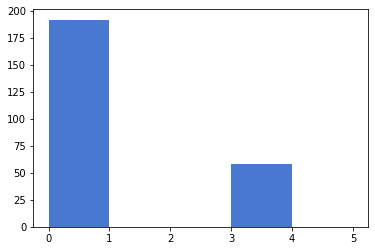

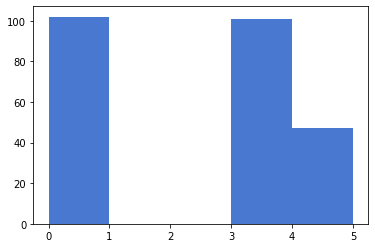

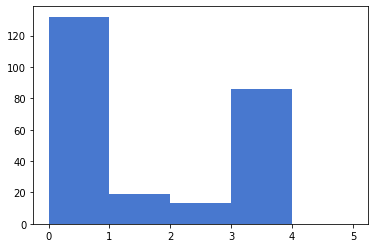

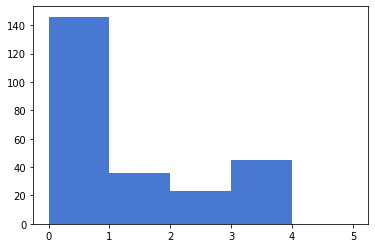

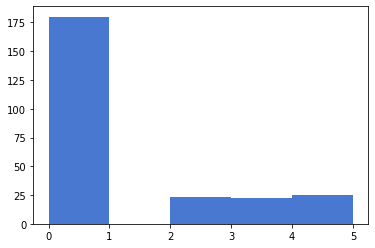

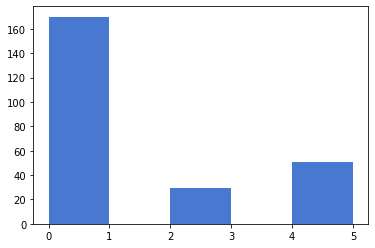

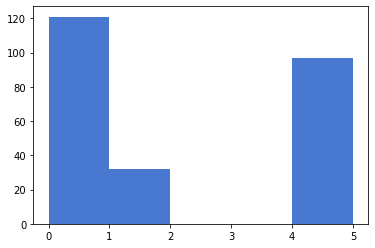

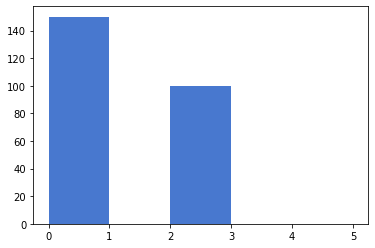

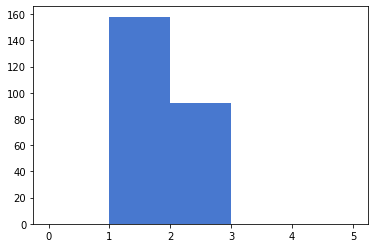

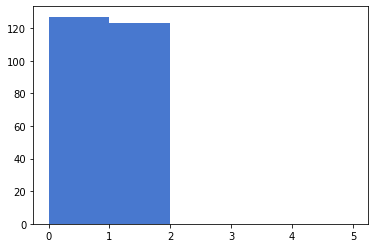

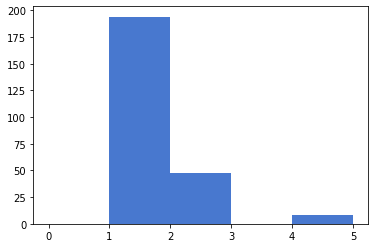

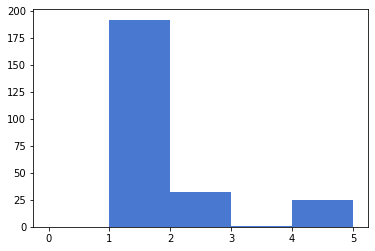

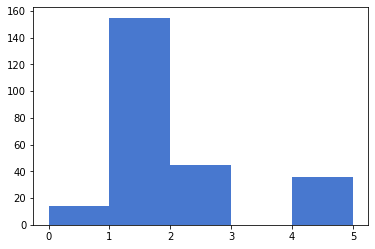

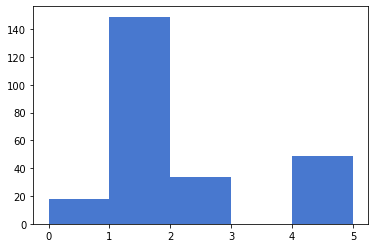

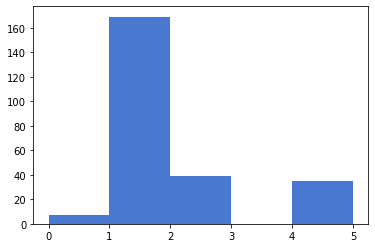

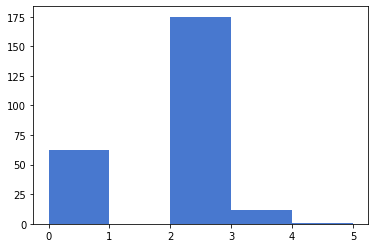

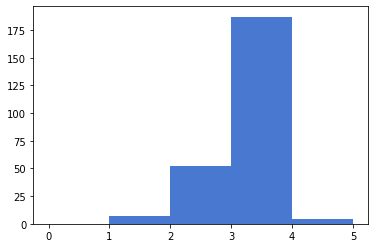

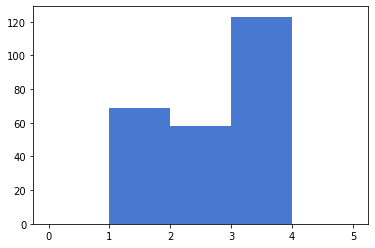

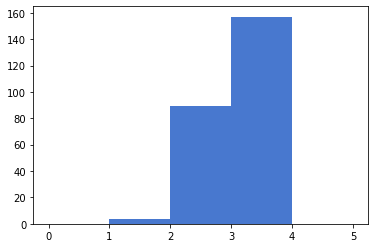

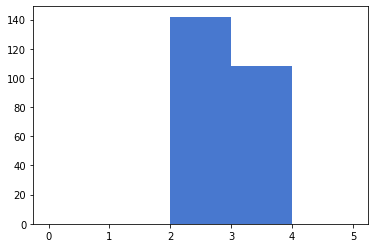

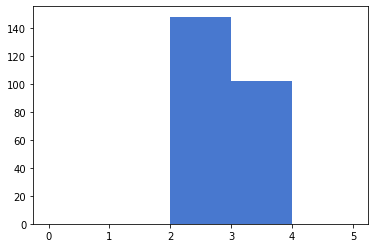

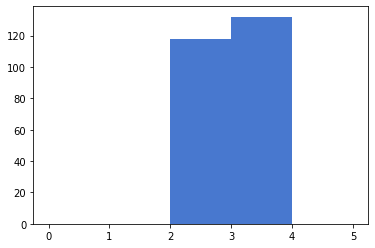

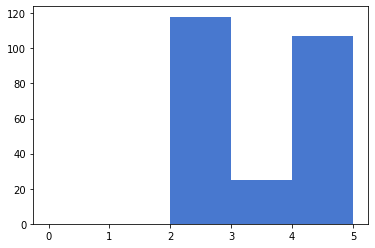

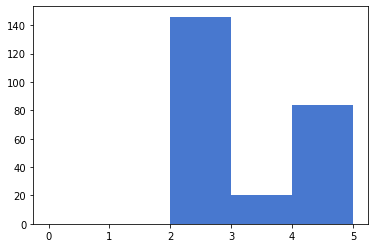

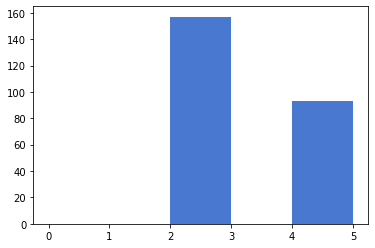

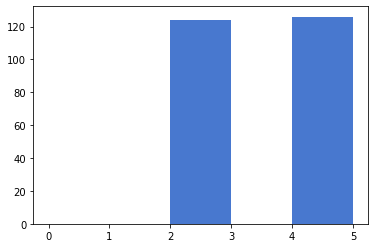

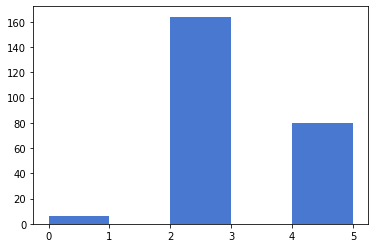

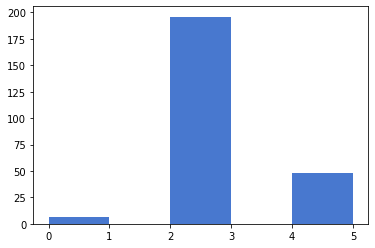

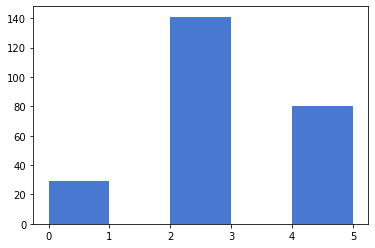

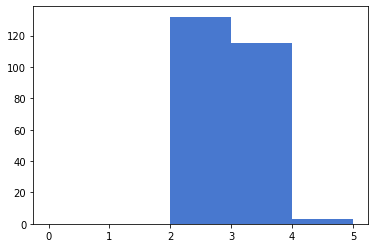

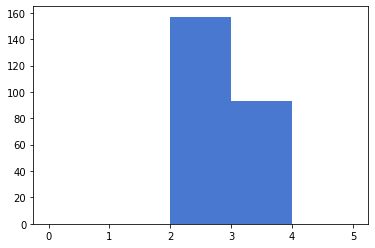

In [4]:
migration(data, 50)

In [5]:
pays, individus, historique_pays, historique_individus = data
historique_pays[0]

[[0.8444218515250481, 0.7579544029403025, 142],
 [0.8444218515250481, 0.7579544029403025, 160],
 [0.8444218515250481, 0.7579544029403025, 168],
 [0.8444218515250481, 0.7579544029403025, 164],
 [0.8632189986449378, 0.5753684727808457, 104],
 [0.824539091439242, 0.6467140621554278, 101],
 [0.8081207700599344, 0.5624576371120976, 111],
 [0.6912265575561023, 0.48213851158989823, 22],
 [0.6051957876877211, 0.5798845410302833, 120],
 [0.6051957876877211, 0.5798845410302833, 130],
 [0.560201213592687, 0.5730278312361199, 30],
 [0.6481767978018834, 0.4702377209756565, 1],
 [0.6481767978018834, 0.4702377209756565, 0],
 [0.7303177277257331, 0.5675524340969529, 127],
 [0.7303177277257331, 0.5675524340969529, 179],
 [0.7303177277257331, 0.5675524340969529, 127],
 [0.7303177277257331, 0.5675524340969529, 100],
 [0.7841155147474769, 0.6130376214570705, 171],
 [0.7843577752442219, 0.47770141560002655, 126],
 [0.7843577752442219, 0.47770141560002655, 192],
 [0.7031713247334268, 0.5590362086611391, 102

In [6]:
#Historique_pays sans valeurs clés
val_list = list(historique_pays.values())


Pays # 0


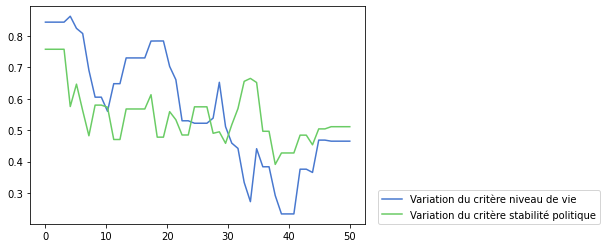

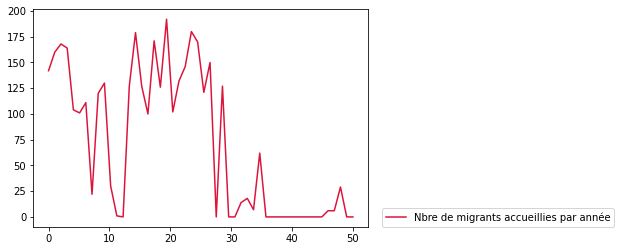

Pays # 1


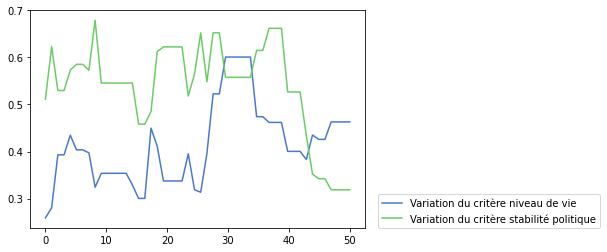

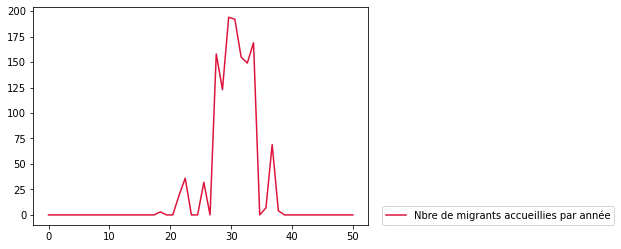

Pays # 2


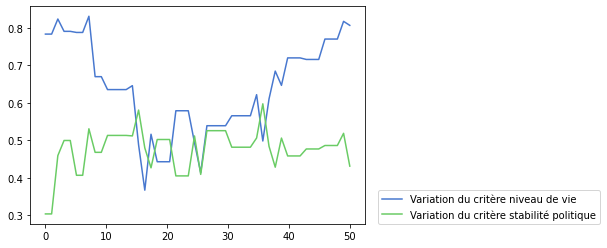

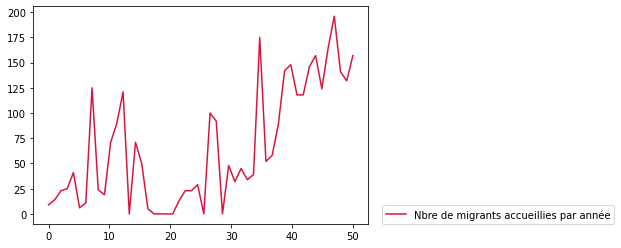

Pays # 3


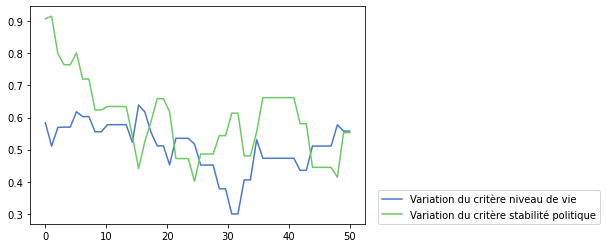

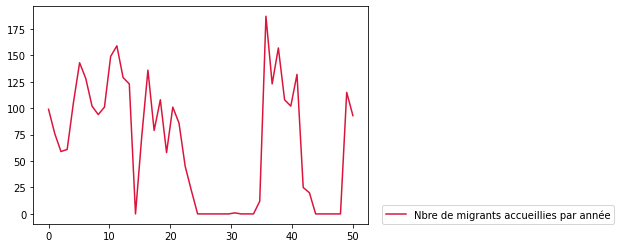

Pays # 4


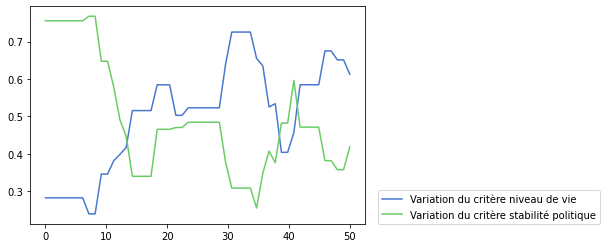

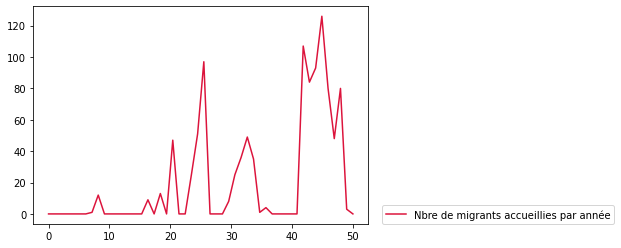

In [7]:
# 3 courbes - Variation du critère niveau de vie, Variation du critère stabilité politique et Nbre de migrants accueillies par année 
# pour chaque annee

k = 0
for countries in val_list:
    nb_migrants = []
    var_nv =  []
    var_sp = []
    for year in countries:
        var_nv.append(year[0])
        var_sp.append(year[1])
        nb_migrants.append(year[2])

    print("Pays #", k)
    x1 = np.linspace(0, 50, 50)
    plt.figure()
    plt.plot(x1, var_nv, label = "Variation du critère niveau de vie")
    plt.plot(x1, var_sp, label = "Variation du critère stabilité politique")
    plt.legend(loc=(1.04,0))
    plt.show()
    
    x2 = np.linspace(0, 50, 50)
    plt.figure()
    plt.plot(x2, nb_migrants,color='crimson', label = "Nbre de migrants accueillies par année")
    plt.legend(loc=(1.04,0))
    plt.show()
    
    k = k + 1

In [8]:
#Nombre total de personnes qui ont migré vers un pays (nous ne comptons pas les personnes qui sont parties)
mig_tot = []
for countries in val_list:
    nb = 0
    for year in countries:
        nb = nb + year[2]
    mig_tot.append(nb)

In [9]:
mig_tot

[3545, 1310, 3300, 3311, 1034]

In [10]:
#Historique_individus sans valeurs clés
paths = list(historique_individus.values())

In [11]:
#Déplacements de chacun individu
m = 1
list_of_paths = []
nb_of_travels = []
for person in paths:
    print("Déplacement de la personne #", m)
    edges = []
    for i in range(len(person)-1):
        if person[i]!=person[i+1]:
            print(person[i],"--> ",end = " " )
            edges.append((person[i],person[i+1]))
    list_of_paths.append(edges)
    nb_of_travels.append(len(edges))
    print(person[i+1], end="\n\n\n")
            
    
    m = m+1

Déplacement de la personne # 1
3 -->  0 -->  3 -->  0 -->  1 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 2
0 -->  2 -->  0 -->  3 -->  0 -->  2 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 3
0 -->  2 -->  0 -->  3 -->  0 -->  2 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 4
0 -->  2 -->  0 -->  3 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 5
0 -->  3 -->  0 -->  1 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 6
3 -->  0 -->  2 -->  0 -->  3 -->  0 -->  1 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 7
0 -->  3 -->  0 -->  1 -->  0 -->  3 -->  2


Déplacement de la personne # 8
0 -->  2 -->  0 -->  3 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 9
0 -->  2 -->  0 -->  3 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 10
0 -->  2 -->  0 -->  3 -->  0 -->  1 -->  2 -->  3 -->  2


Déplacement de la personne # 11
3 -->  0 -->  3

0 -->  3 -->  0 -->  2 -->  0 -->  3 -->  2 -->  3 -->  0 -->  2 -->  3 -->  0 -->  3 -->  1 -->  0 -->  1 -->  0 -->  1 -->  2 -->  3 -->  4 -->  2 -->  4 -->  2 -->  4 -->  3 -->  2


Déplacement de la personne # 151
0 -->  3 -->  0 -->  2 -->  0 -->  3 -->  2 -->  3 -->  0 -->  2 -->  3 -->  0 -->  3 -->  0 -->  4 -->  2 -->  1 -->  2 -->  3 -->  2 -->  4 -->  2 -->  4 -->  2 -->  0 -->  3 -->  2


Déplacement de la personne # 152
0 -->  2 -->  3 -->  0 -->  2 -->  0 -->  3 -->  2 -->  3 -->  0 -->  3 -->  0 -->  3 -->  0 -->  3 -->  0 -->  4 -->  2 -->  1 -->  4 -->  1 -->  2 -->  3 -->  1 -->  3 -->  2 -->  4 -->  3 -->  2 -->  4 -->  2 -->  0 -->  3 -->  2


Déplacement de la personne # 153
0 -->  2 -->  0 -->  2 -->  0 -->  3 -->  2 -->  3 -->  0 -->  3 -->  0 -->  3 -->  0 -->  4 -->  3 -->  0 -->  4 -->  2 -->  1 -->  0 -->  1 -->  4 -->  1 -->  2 -->  3 -->  2 -->  4 -->  2 -->  4 -->  2 -->  4 -->  3 -->  2


Déplacement de la personne # 154
0 -->  2 -->  3 -->  0 -->  2 -->

3 -->  2 -->  3 -->  0 -->  2 -->  3 -->  2 -->  3 -->  4 -->  3 -->  4 -->  3 -->  4 -->  2 -->  4 -->  2 -->  0 -->  4 -->  2 -->  3 -->  4 -->  3


Déplacement de la personne # 242
3 -->  2 -->  3 -->  0 -->  3 -->  2 -->  3 -->  2 -->  3 -->  4 -->  3 -->  4 -->  3 -->  4 -->  3 -->  4 -->  2 -->  0 -->  2 -->  4 -->  3 -->  2 -->  1 -->  2 -->  3 -->  4 -->  3


Déplacement de la personne # 243
2 -->  3 -->  0 -->  3 -->  2 -->  3 -->  2 -->  4 -->  3 -->  4 -->  3 -->  2 -->  4 -->  2 -->  0 -->  4 -->  3 -->  2 -->  3 -->  4 -->  0 -->  3


Déplacement de la personne # 244
2 -->  3 -->  0 -->  3 -->  2 -->  3 -->  2 -->  3 -->  4 -->  3 -->  4 -->  3 -->  4 -->  2 -->  0 -->  4 -->  2 -->  0 -->  2 -->  1 -->  3 -->  4 -->  0 -->  3


Déplacement de la personne # 245
3 -->  0 -->  3 -->  2 -->  3 -->  2 -->  3 -->  4 -->  3 -->  4 -->  3 -->  4 -->  2 -->  1 -->  2 -->  0 -->  2 -->  4 -->  2 -->  0 -->  2 -->  1 -->  3 -->  4 -->  3


Déplacement de la personne # 246
3 -->  0 -

In [12]:
max(nb_of_travels)

35

In [13]:
min(nb_of_travels)

6

In [14]:
np.mean(nb_of_travels)

17.044

In [15]:
np.median(nb_of_travels)

16.0